# Artifact 1

## Analyzing how to get the shortest path of a Tree using algorithms

### Why is finding the shortest path important?
Finding the shortest path is crucial in various fields and applications due to its practical implications and significance in optimizing resources, time, and efficiency. Here are several reasons why finding the shortest path is important in the class examples:

Resource Allocation: In project management and resource allocation, determining the shortest path helps in optimizing resource usage, reducing costs, and completing projects in the most time-efficient manner. Critical Path Analysis (CPA) is a method that relies on finding the shortest path in project scheduling.

Transportation and Logistics: For vehicles or goods moving from one location to another, finding the shortest path is crucial to minimize travel time, reduce fuel consumption, and optimize resource usage. This is relevant in route planning for delivery services, navigation systems, and traffic management.

Communication Networks: In telecommunications, finding the shortest path is critical for establishing efficient communication links. This is applicable in the design and optimization of optical networks, satellite communication, and other communication infrastructure.



### Do paths have different weights?
Yes, paths in a graph can have different weights. In graph theory, the term "weight" typically refers to a numerical value associated with an edge or a vertex. These weights can represent various quantities such as distances, costs, time, or any other measure relevant to the specific context of the problem being modeled.

The concept of weights becomes particularly important when dealing with shortest path problems in a graph. Algorithms like Dijkstra's algorithm and the Bellman-Ford algorithm, for example, take into account the weights of edges to find the shortest path between two vertices.


### What algorithm to used?

Dijkstra's Algorithm (min length included weighted edges)

### Lets take a close look at two of these algorithms to see how they are programmed 
1) Breadth First Search <br>
2) Dijkstra's Algorithm

### Understanding Breadth First Search

Breadth First Search is used to find the shortest r-u-path for all vertex reachable from $r$ (where $r$ is a starting vertex). <br>

If we are given the vertex and edges of a graph as well as a starting point to use we can use the algorithm to calculate the shortest path for all the other vertex from $r$. <br>

Each vertex $v$ has $d(v)$. At the start we assign $d(v) = infinity$ apart from $d(r)$ which has $d(r) = 0$.

Lets consider to sets:

$A$ = Set of vertex to be explored
$B$ = Set of vertex that have been explored

The algorithm works as follows:

While $A$ is non empty set <br>
>  Let u be first vertex in $A$ with $d(u)$ = min{$d(w)$: w ∈ $A$}     (explore $u$) <br>
>  Move u from $A$ to $B$ <br>
>  While there is v that ∈ V and not B with d(v) = infinity and $(u, v)$ is an edge <br>
>> set $d(v) = d(u) + 1$ <br>
>> $p(v) = u$ <br>
>> Add $v$ to end of $A$ <br>

### Using Breadth First Search in Python

Lets consider the following tree and run the python algorithm on it.

Algorithm is a variation of the one found here:
https://favtutor.com/blogs/breadth-first-search-python

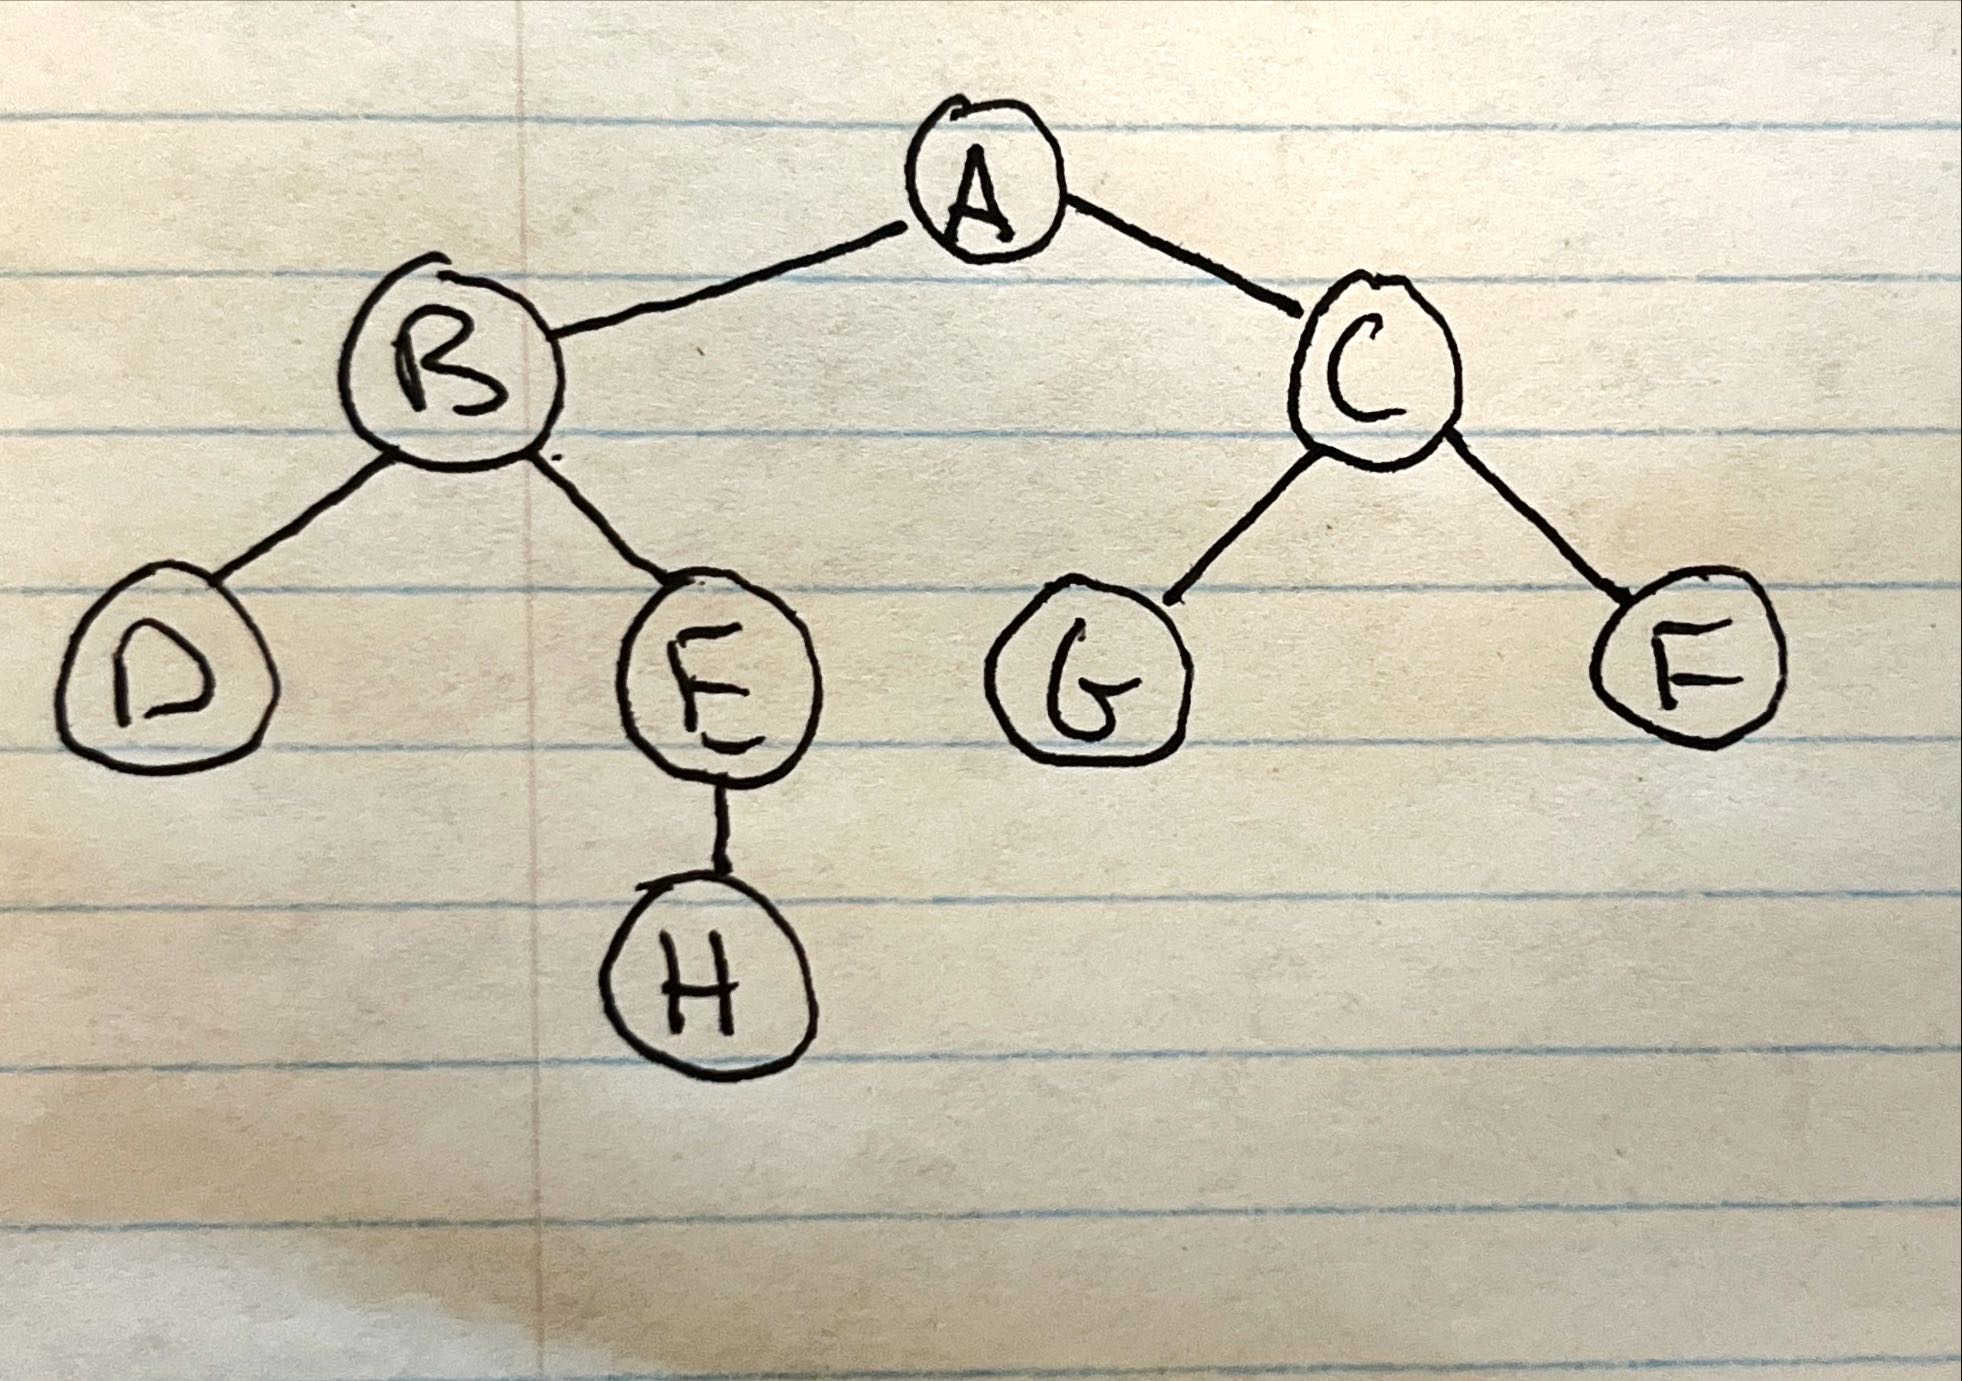

In [6]:
from IPython.display import Image

Image(filename='Data/Tree_Example.jpeg')


In [7]:
from collections import deque

def bfs_shortest_path(graph, start):
    visited = set()             # To keep track of visited vertices
    distances = {start: 0}      # Dictionary to store the distance of each vertex from the start
    queue = deque([start])       # Using a deque to efficiently pop from the left

    while queue:
        vertex = queue.popleft() # popleft() function removes the leftmost element from the deque and returns it
        if vertex not in visited:
            print(f"Vertex: {vertex}, Shortest Path Length: {distances[vertex]}")

            visited.add(vertex)

            # Enqueue neighbors of the current vertex and update distances
            for neighbor in graph[vertex]:
                if neighbor not in visited:
                    distances[neighbor] = distances[vertex] + 1
                    queue.append(neighbor)

# Example usage:

# Representing an undirected graph as an adjacency list
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F', 'G'],
    'D': ['B'],
    'E': ['B', 'H'],
    'F': ['C'],
    'G': ['C'],
    'H': ['E']
}

# Starting BFS from vertex 'A'
print("BFS traversal with shortest path lengths starting from vertex 'A':")
bfs_shortest_path(graph, 'A')

BFS traversal with shortest path lengths starting from vertex 'A':
Vertex: A, Shortest Path Length: 0
Vertex: B, Shortest Path Length: 1
Vertex: C, Shortest Path Length: 1
Vertex: D, Shortest Path Length: 2
Vertex: E, Shortest Path Length: 2
Vertex: F, Shortest Path Length: 2
Vertex: G, Shortest Path Length: 2
Vertex: H, Shortest Path Length: 3


Notice that we do not have to pick A as the starting vertex <br>
We can also find the distance from vertex B (or any other vertex in the tree) to any other vertex

In [8]:
print("BFS traversal with shortest path lengths starting from vertex 'A':")
bfs_shortest_path(graph, 'B')

BFS traversal with shortest path lengths starting from vertex 'A':
Vertex: B, Shortest Path Length: 0
Vertex: A, Shortest Path Length: 1
Vertex: D, Shortest Path Length: 1
Vertex: E, Shortest Path Length: 1
Vertex: C, Shortest Path Length: 2
Vertex: H, Shortest Path Length: 2
Vertex: F, Shortest Path Length: 3
Vertex: G, Shortest Path Length: 3


### Understanding Dijkstra's Algorithm

Breadth first search only takes into account length and gets the shortest path. Each edge is given the same weight. Dijkstra's Algorithm takes into account weight of each edge. In practice this weight would represent different cost (as indicated above).

If we are given the vertex and edges with its corresponding weight of a graph as well as a starting point to use we can use the algorithm to calculate the shortest path for all the other vertex from $r$. <br>

Each vertex $v$ has $d(v)$. At the start we assign $d(v) = infinity$ apart from $d(r)$ which has $d(r) = 0$.

Lets consider to sets:

$A$ = Set of vertex to be explored <br>
$B$ = Set of vertex that have been explored

The algorithm works as follows:

While A is non empty set <br>
>  Let $u$ be first vertex in A with $d(u)$ = min{$d(w)$: $w$ exist $A$}     (explore $u$) <br>
>  Move $u$ from $A$ to $B$ <br>
>  While there is $v$ that exist in $V$ and not $B$ with $d(v)$ > $d(u)$ + $w(u, v)$ and $(u, v)$ is an edge <br>
>> set $d(v)$ = $d(u)$ + $w(u, v)$ <br>
>> $p(v)$ = $u$ <br>
>> Add $v$ to end of $A$ if not already there <br>

Lets consider the following tree with weights on its edges and run the python algorithm on it.

This algorithm is implemented pretty much the same as breadth first search but taking into account the weights

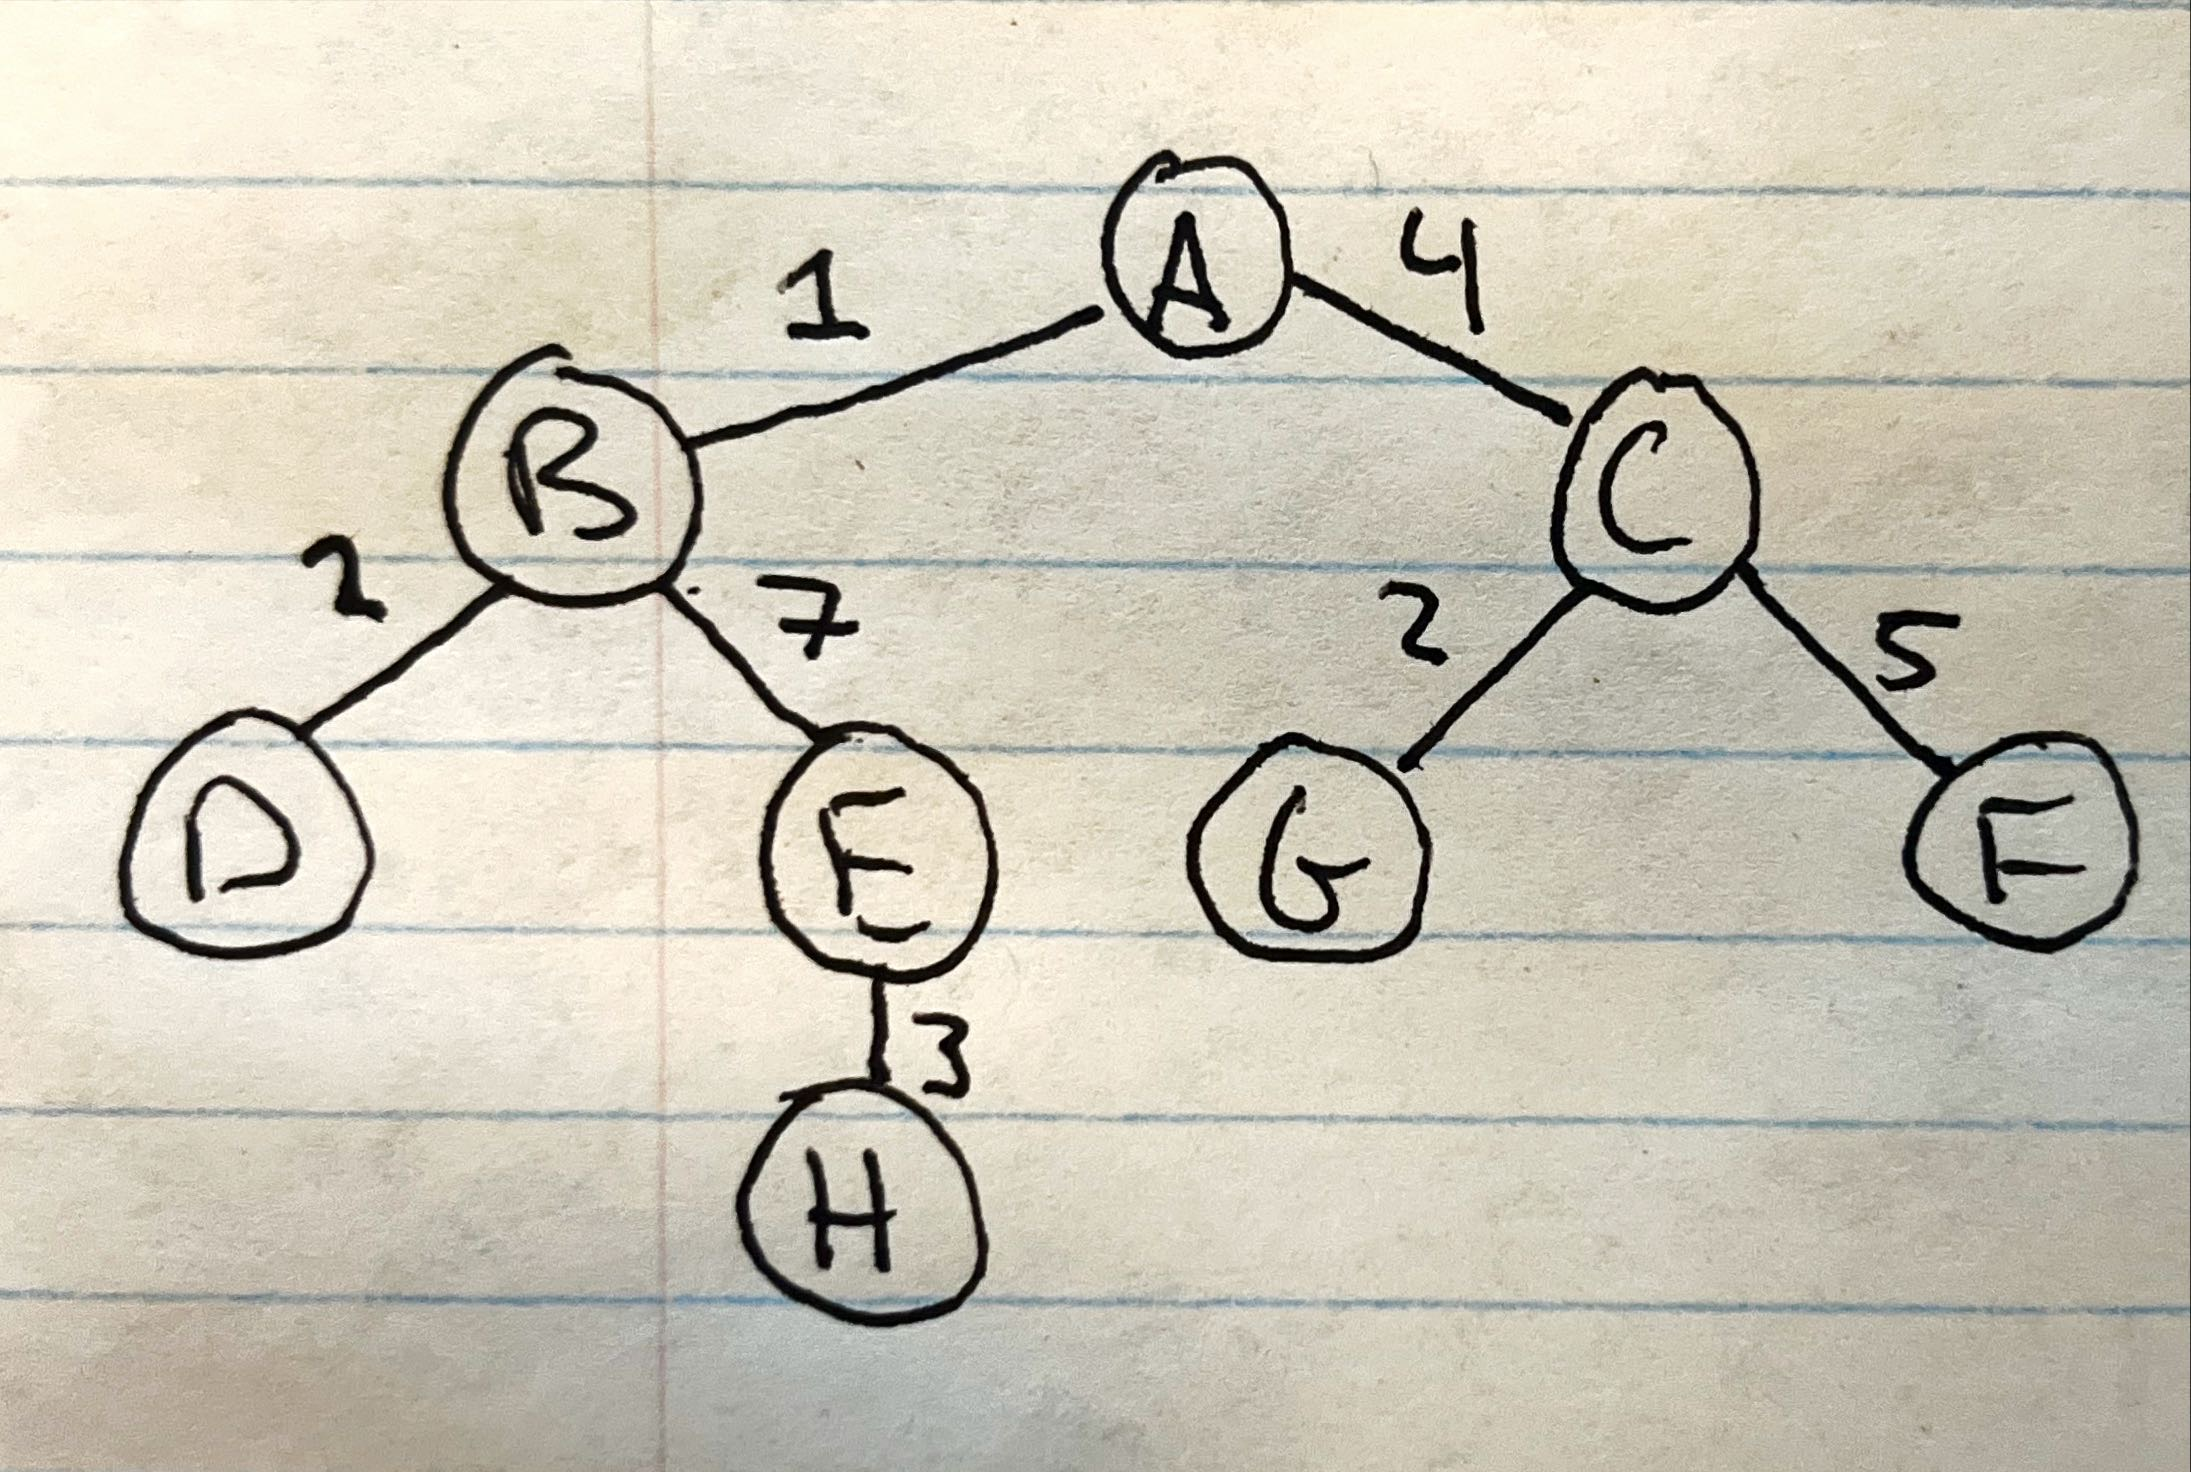

In [9]:
from IPython.display import Image

Image(filename='Data/Tree_Example_2.jpeg')

In [10]:
import heapq

def dijkstra(graph, start):
    # Priority queue to store (distance, vertex) pairs
    priority_queue = [(0, start)]
    # Dictionary to store the tentative distances from the start vertex
    distances = {vertex: float('infinity') for vertex in graph}
    distances[start] = 0

    while priority_queue:
        current_distance, current_vertex = heapq.heappop(priority_queue) # removes and returns the smallest element from the priority queue

        # Skip if we have already processed this vertex with a shorter distance
        if current_distance > distances[current_vertex]:
            continue

        # Explore neighbors of the current vertex
        for neighbor, weight in graph[current_vertex].items():
            distance = current_distance + weight

            # Update distance if a shorter path is found
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(priority_queue, (distance, neighbor)) # add a vertex along with its associated distance to the priority queue

    return distances

# Example usage:

# Representing a weighted graph as an adjacency list
graph = {
    'A': {'B': 1, 'C': 4},
    'B': {'A': 1, 'D': 2, 'E': 7},
    'C': {'A': 4, 'F': 5, 'G': 2},
    'D': {'B': 2},
    'E': {'B': 7, 'H': 3},
    'F': {'C': 5},
    'G': {'C': 2},
    'H': {'E': 3}
}

# Starting Dijkstra's Algorithm from vertex 'A'
start_vertex = 'A'
result = dijkstra(graph, start_vertex)

# Displaying the shortest distances from the start vertex
for vertex, distance in result.items():
    print(f"Shortest distance from {start_vertex} to {vertex}: {distance}")


Shortest distance from A to A: 0
Shortest distance from A to B: 1
Shortest distance from A to C: 4
Shortest distance from A to D: 3
Shortest distance from A to E: 8
Shortest distance from A to F: 9
Shortest distance from A to G: 6
Shortest distance from A to H: 11


**Why is heapq important:**

Ordering: heapq keeps the queue ordered by the shortest distance automatically, ensuring the algorithm always processes the most promising vertex next (i.e., the vertex that could potentially provide a shorter path to its neighbors).

Dynamic Updates: When the algorithm finds a shorter path to a vertex, it needs to update the priority queue. While heapq does not support direct decrease-key operations, by pushing new entries with updated shorter distances into the queue, and skipping vertices with outdated distances when extracted, the desired behavior of a decrease-key operation is effectively mimicked.

### Doing this on a bigger example:

The code to load the file was taken from Chat GPT

In [11]:
def load_edges_file(file_path):
    graph = {}
    try:
        with open(file_path, 'r') as file:
            for line in file:
                parts = line.strip().split()
                if len(parts) < 2:
                    continue  # skip malformed lines
                u = parts[0]
                v = parts[1]
                weight = float(parts[2]) if len(parts) == 3 else 1  # default weight is 1 for unweighted edges

                if u not in graph:
                    graph[u] = {}
                if v not in graph:
                    graph[v] = {}

                graph[u][v] = weight
                # If the graph is undirected, uncomment the next line:
                # graph[v][u] = weight
    except IOError:
        print("File not found or path is incorrect")
    except ValueError:
        print("Ensure that the file contains only integers or floats for weights")

    return graph

# Example usage:
file_path = 'Data/bio-CE-GN.edges'  # Make sure to replace 'your_file.edges' with the actual path to your .edges file
graph = load_edges_file(file_path)


In [12]:
result = dijkstra(graph, '0')

In [13]:
result

{'0': 0,
 '1': 1.18435859354703,
 '2': 1.62331806896967,
 '3': 1.18435859354703,
 '4': 1.62331806896967,
 '5': 1.62331806896967,
 '6': 1.62331806896967,
 '7': 1.62331806896967,
 '8': inf,
 '9': 4.81312248972372,
 '10': 6.25856606588898,
 '11': 4.666281757301275,
 '12': 3.9367861617999225,
 '13': 3.994712716159659,
 '14': 3.83136431259216,
 '15': 3.994712716159659,
 '16': 3.57324555884634,
 '17': 3.033179300986583,
 '18': 3.994712716159659,
 '19': 3.965314421304924,
 '20': 2.45966372096927,
 '21': 3.197228995743986,
 '22': 3.5534090488922008,
 '23': 3.5534090488922008,
 '24': 4.2386079368660905,
 '25': 3.588283412788071,
 '26': 3.3502824754571,
 '27': 3.34209261835478,
 '28': 3.35074437795538,
 '29': 2.905131556782458,
 '30': 3.2847757202565546,
 '31': 3.146579181559282,
 '32': 3.58908449515794,
 '33': inf,
 '34': inf,
 '35': inf,
 '36': 3.62282007264083,
 '37': 5.692819437355411,
 '38': 3.6098805162623697,
 '39': 3.25461745855047,
 '40': 3.62282007264083,
 '41': 3.0883094176713968,
 '4

Background info on data:
    
Short: Gene functional associations <br>
Vertex type: Genes<br>
Edge type: Lines<br>
Format: Undirected<br>
Edge weights: Weighted<br>

## Improvements

- Had a lot of trouble trying to visualize the graph. Tried lecture notes, google, chat gpt and couldn't get any to run properly. However you can visualize the graph here:
https://networkrepository.com/bio-CE-GN.php

